In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Climate_Ready_Boston_Social_Vulnerability.csv')
df.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637


## Data Preprocessing

### Define features interested 

In [3]:
features_interested = ['Name','AREA_SQFT', 'POP100_RE', 'HU100_RE', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']
data = df[features_interested]
data.head()

,Name,AREA_SQFT,POP100_RE,HU100_RE,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes
0,Mission Hill,3914567.54,5522,994,60,331,1191,1522,1755,2131.22
1,Fenway,1472713.92,5817,1862,77,56,2387,2443,1749,2201.14
2,Back Bay,1376667.12,2783,1899,281,390,72,462,447,1214.76
3,Back Bay,3228780.12,2400,1643,86,285,187,472,320,1014.20
4,Fenway,2741497.18,3173,1283,13,36,895,931,1039,1181.78


### Group by Neighborhood

In [4]:
data = data.groupby('Name').sum()
data.head(10)

,AREA_SQFT,POP100_RE,HU100_RE,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes
Name,,,,,,,,,
Allston,4.496899e+06,7592,3823,173,144,3300,3444,3011,2831.85
Back Bay,3.409361e+07,28634,18365,1686,3759,5316,9075,6923,11842.96
Bay Village,9.390969e+06,10850,5076,1249,1711,3929,5640,6008,4292.93
Brighton,1.013412e+08,60821,27143,4244,5847,17067,22914,19768,23936.80
Charlestown,3.768344e+07,16439,8648,3301,1811,4157,5968,3981,6461.47
Dorchester,1.312735e+08,69695,27507,17424,6535,22749,29284,50778,25010.76
East Boston,1.494380e+08,40517,15857,8665,4147,13698,17845,25459,14824.60
Fenway,2.402810e+07,27138,9243,453,496,6681,7177,9808,10080.74
Harbor Islands,3.569313e+07,535,0,0,12,349,361,370,230.53


### Convert group populations to percentages

In [5]:
data['TotChild'] = data['TotChild'] / data['POP100_RE']
data['OlderAdult'] = data['OlderAdult'] / data['POP100_RE']
data['Low_to_No'] = data['Low_to_No'] / data['POP100_RE']
data['LEP'] = data['LEP'] / data['POP100_RE']
data['POC2'] = data['POC2'] / data['POP100_RE']
data['MedIllnes'] = data['MedIllnes'] / data['POP100_RE']
data.head(5)

,AREA_SQFT,POP100_RE,HU100_RE,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes
Name,,,,,,,,,
Allston,4.496899e+06,7592,3823,0.022787,0.018967,0.434668,0.453635,0.396602,0.373004
Back Bay,3.409361e+07,28634,18365,0.058881,0.131278,0.185653,0.316931,0.241776,0.413598
Bay Village,9.390969e+06,10850,5076,0.115115,0.157696,0.362120,0.519816,0.553733,0.395662
Brighton,1.013412e+08,60821,27143,0.069779,0.096135,0.280610,0.376745,0.325019,0.393561
Charlestown,3.768344e+07,16439,8648,0.200803,0.110165,0.252874,0.363039,0.242168,0.393057


### Create New Columns for Demographic Data
- Housing density 
- Population density
- Social vulnerability
    - Age: children (TotChild) / older adult (OlderAdult)
    - Race: people with color (POC2) / people with low english proficiency (LEP)
    - Income: people with low to no income (Low_to_No)
    - Health: people with medical conditions (MedIllnes)

In [6]:
data['Housing_Density'] = data['HU100_RE'] / data['AREA_SQFT'] * 100
data['Population_Density'] = data['POP100_RE'] / data['AREA_SQFT'] * 100
data.head()

,AREA_SQFT,POP100_RE,HU100_RE,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Housing_Density,Population_Density
Name,,,,,,,,,,,
Allston,4.496899e+06,7592,3823,0.022787,0.018967,0.434668,0.453635,0.396602,0.373004,0.085014,0.168827
Back Bay,3.409361e+07,28634,18365,0.058881,0.131278,0.185653,0.316931,0.241776,0.413598,0.053866,0.083986
Bay Village,9.390969e+06,10850,5076,0.115115,0.157696,0.362120,0.519816,0.553733,0.395662,0.054052,0.115537
Brighton,1.013412e+08,60821,27143,0.069779,0.096135,0.280610,0.376745,0.325019,0.393561,0.026784,0.060016
Charlestown,3.768344e+07,16439,8648,0.200803,0.110165,0.252874,0.363039,0.242168,0.393057,0.022949,0.043624


In [7]:
# Sample DataFrame
df = pd.DataFrame({
    'Name': list(data.index),
    'TotChild': list(data['TotChild']),
    'OlderAdult': list(data['OlderAdult']),
    'Low_to_No': list(data['Low_to_No']),
    'LEP': list(data['LEP']),
    'POC2': list(data['POC2']),
    'MedIllnes': list(data['MedIllnes']),
})

# Define weights for each factor (you can adjust these as needed)
weights = {
    'TotChild': 1,
    'OlderAdult': 1,
    'Low_to_No': 1,
    'LEP': 1,
    'POC2': 1,
    'MedIllnes': 1,
}

# Calculate the vulnerability score
data['Social_Vulnerability'] = data[['TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']].dot(pd.Series(weights))

# Drop the individual vulnerability factor columns
# df.drop(columns=['TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes'], inplace=True)

data.head()


,AREA_SQFT,POP100_RE,HU100_RE,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Housing_Density,Population_Density,Social_Vulnerability
Name,,,,,,,,,,,,
Allston,4.496899e+06,7592,3823,0.022787,0.018967,0.434668,0.453635,0.396602,0.373004,0.085014,0.168827,1.699664
Back Bay,3.409361e+07,28634,18365,0.058881,0.131278,0.185653,0.316931,0.241776,0.413598,0.053866,0.083986,1.348116
Bay Village,9.390969e+06,10850,5076,0.115115,0.157696,0.362120,0.519816,0.553733,0.395662,0.054052,0.115537,2.104141
Brighton,1.013412e+08,60821,27143,0.069779,0.096135,0.280610,0.376745,0.325019,0.393561,0.026784,0.060016,1.541849
Charlestown,3.768344e+07,16439,8648,0.200803,0.110165,0.252874,0.363039,0.242168,0.393057,0.022949,0.043624,1.562107


## Plotting

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

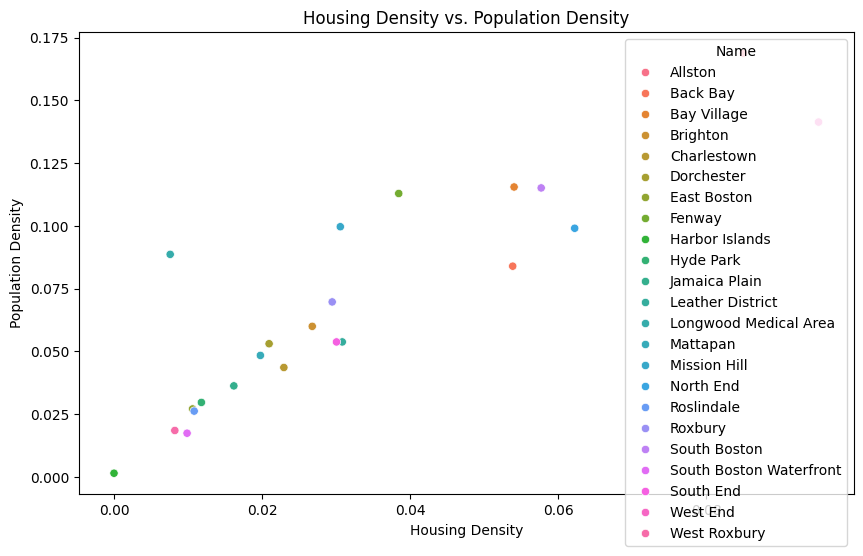

In [9]:
# Scatter plot of Housing Density vs. Population Density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Housing_Density', y='Population_Density', hue='Name')
plt.title('Housing Density vs. Population Density')
plt.xlabel('Housing Density')
plt.ylabel('Population Density')
plt.savefig('../results/housing_density_vs_population_density.png')
plt.show()


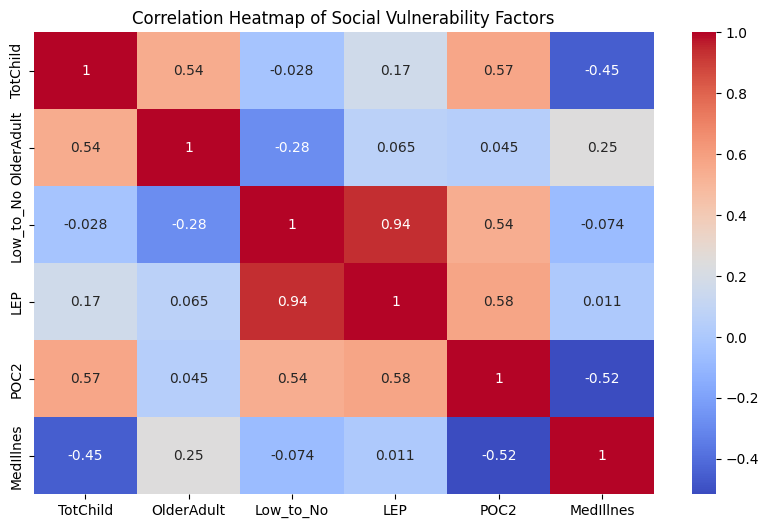

In [10]:
# Heatmap of social vulnerability factors
vulnerability_factors = ['TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']
plt.figure(figsize=(10, 6))
sns.heatmap(data[vulnerability_factors].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Social Vulnerability Factors')
plt.savefig('../results/correlation_heatmap_of_social_vulnerability_factors.png')
plt.show()

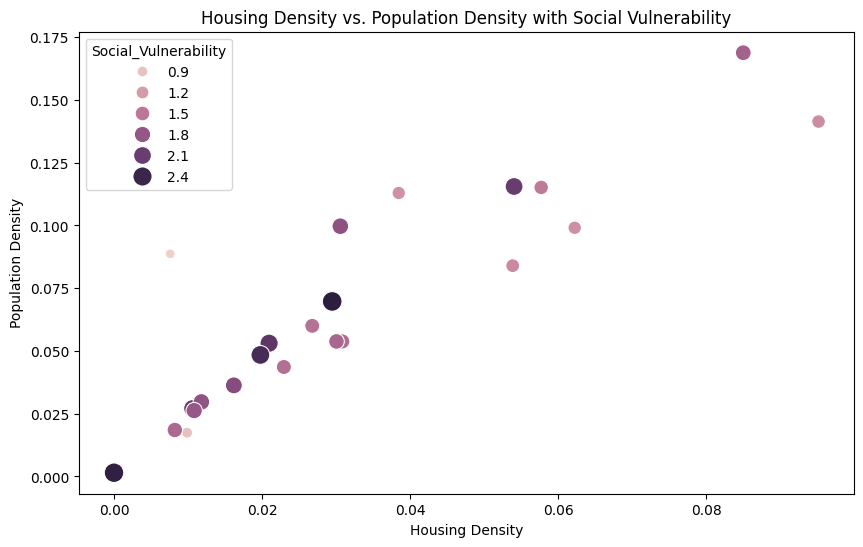

In [11]:
# Bubble chart with social vulnerability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Housing_Density', y='Population_Density', hue='Social_Vulnerability', size='Social_Vulnerability', sizes=(50, 200))
plt.title('Housing Density vs. Population Density with Social Vulnerability')
plt.xlabel('Housing Density')
plt.ylabel('Population Density')
plt.savefig('../results/housing_density_vs_population_density_with_social_vulnerability.png')
plt.show()

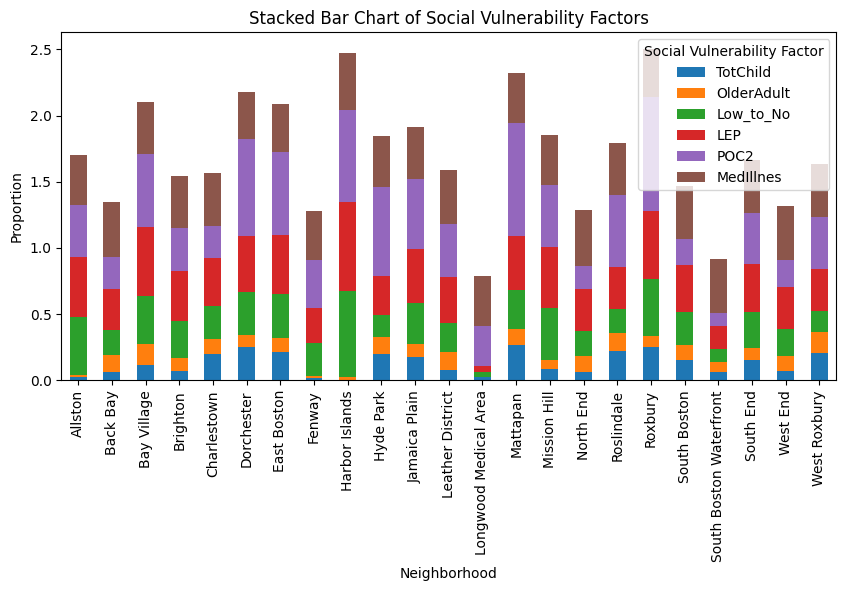

In [12]:
# Stacked bar chart for social vulnerability factors
data[vulnerability_factors].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Social Vulnerability Factors')
plt.xlabel('Neighborhood')
plt.ylabel('Proportion')
plt.subplots_adjust(bottom=0.3)
plt.legend(title='Social Vulnerability Factor')
plt.savefig('../results/stacked_bar_chart_of_social_vulnerability_factors.png')
plt.show()